In [1]:
import sklearn
import numpy
import pandas
import scipy
import re
import string
import datetime
from datetime import date

In [2]:
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
from sklearn import preprocessing 

In [4]:
pandas.options.mode.chained_assignment = None

In [5]:
file=open('./jbas7.csv')
data=pandas.read_csv(file)

In [6]:
data

,Unnamed: 0,Unnamed: 0.1,Issue_key,Summary,Status,Project_name,Priority,Resolution,Components,Labels,...,Docs_lab,Build_lab,Testsuite_lab,ORM_lab,Rest_lab,Logging_lab,EE_lab,OSGI_lab,JCA_lab,Other_lab
0,0,0,AS7-6341,EJB2 CMP - 'JBAS014172: Instance not found in ...,Resolved,Application Server 7,Minor,Done,EJB,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,1,AS7-6441,Transaction automatically started for MDB even...,Resolved,Application Server 7,Major,Done,EJB,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,2,AS7-995,Exploded EAR deployment error - java.util.zip....,Closed,Application Server 7,Major,Done,VFS,ear maven vfs,...,0,0,0,0,0,0,0,0,0,1
3,3,3,AS7-1739,resteasy.scan=true in web.xml causes error,Closed,Application Server 7,Minor,Done,REST Test Suite,NaN,...,0,0,1,0,1,0,0,0,0,0
4,4,4,AS7-4208,Inconsistent behaviour when dealing with reste...,Resolved,Application Server 7,Major,Done,REST,NaN,...,0,0,0,0,1,0,0,0,0,0
5,5,5,AS7-2593,Hang in IIOPNamingTestCase with OpenJDK,Resolved,Application Server 7,Major,Done,IIOP,NaN,...,0,0,0,0,0,0,0,0,0,0
6,6,6,AS7-6911,jconsole fails if trying to connect to a stand...,Resolved,Application Server 7,Major,Done,CLI,cli,...,0,0,0,0,0,0,0,0,0,0
7,7,7,AS7-2185,Don't expose the platform LoggingMXBean over m...,Resolved,Application Server 7,Major,Done,Domain Management,as7-ignored,...,0,0,0,0,0,0,0,0,0,0
8,8,8,AS7-5832,Unable to read undefined messaging queue attri...,Resolved,Application Server 7,Major,Done,JMS,NaN,...,0,0,0,0,0,0,0,0,0,0
9,9,9,AS7-4747,xercesImpl-2.9.1-jbossas-1.jar is susceptible ...,Resolved,Application Server 7,Major,Done,?,xercesImpl,...,0,0,0,0,0,0,0,0,0,1


ttr
Минимум: 0  Максимум: 1792  Среднее: 39.53498641304348
Attachments
Минимум: 0  Максимум: 15  Среднее: 0.21535326086956522
Comments
Минимум: 0  Максимум: 83  Среднее: 2.9096467391304346


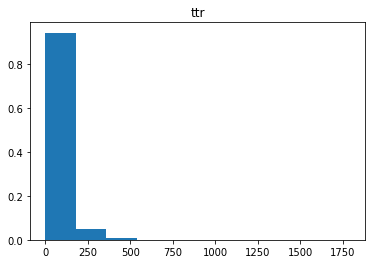

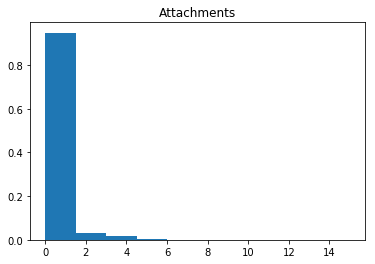

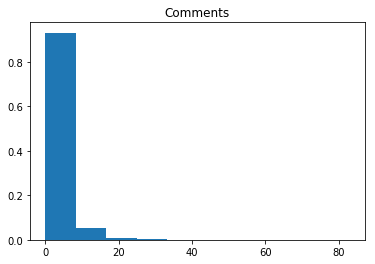

In [6]:
def infa(data, field):
    print (field)    
    print ('Минимум: ' + str(data[field].min())+ '  Максимум: ' + str(data[field].max())+'  Среднее: ' + str(data[field].mean()))
     
  
    plt.figure()
    btt=numpy.array(data[field])
    hist_rf=plt.hist(btt, weights=numpy.zeros_like(btt) + 1. / btt.size, bins=10)
    plt.title(field) 
    
    return

infa(data, 'ttr')
infa(data, 'Attachments')
infa(data, 'Comments')

Status
Closed       614
Resolved    2330
Name: Issue_key, dtype: int64


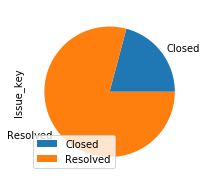

In [7]:
#Смотрим, какие статусы есть, и отображаем это на pie chart
print(data.groupby(['Status'])['Issue_key'].count())
plot = data.groupby(['Status'])['Issue_key'].count().plot.pie(y='Status', figsize=(3, 3), legend=True)


Resolution
Cannot Reproduce             89
Deferred                     10
Done                       2253
Duplicate Issue             112
Incomplete Description        5
Migrated to another ITS       1
Out of Date                 134
Partially Completed          12
Rejected                    251
Won't Fix                    77
Name: Issue_key, dtype: int64


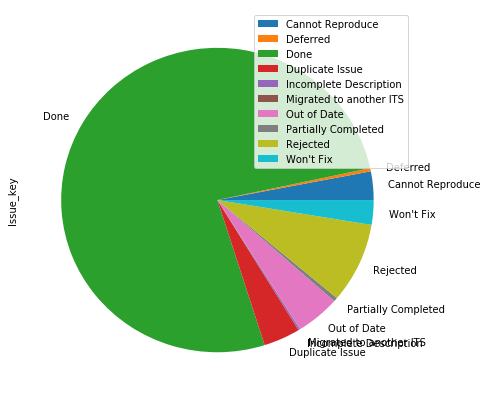

In [22]:
print(data.groupby(['Resolution'])['Issue_key'].count())
plot = data.groupby(['Resolution'])['Issue_key'].count().plot.pie(y='Status', figsize=(7, 7),  legend=True)

Priority
Blocker      166
Critical     313
Major       2262
Minor        191
Optional       4
Trivial        8
Name: Issue_key, dtype: int64


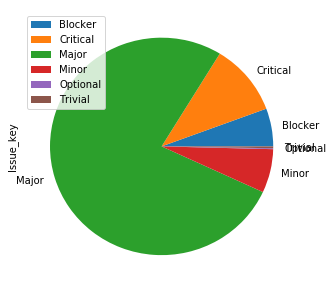

In [23]:
print(data.groupby(['Priority'])['Issue_key'].count())
plot = data.groupby(['Priority'])['Issue_key'].count().plot.pie(y='Status', figsize=(5, 5),legend=True)

was_reopened
0.0    2691
1.0     253
Name: Issue_key, dtype: int64


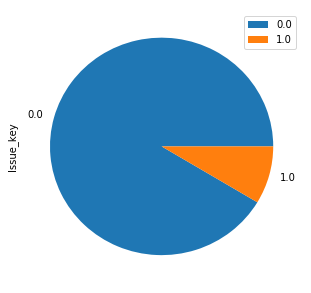

In [24]:
print(data.groupby(['was_reopened'])['Issue_key'].count())
plot = data.groupby(['was_reopened'])['Issue_key'].count().plot.pie(y='Status', figsize=(5, 5),legend=True)

In [6]:
AOT=['Config', 'Clustering', 'Deploy', 'DomManag', 'EJB', 'JMS', 'Security', 'Server', 'Web', 'Docs', 'Build','Testsuite', 'ORM', 'Rest', 'Logging', 'EE', 'OSGI', 'JCA' , 'Other']


<BarContainer object of 19 artists>

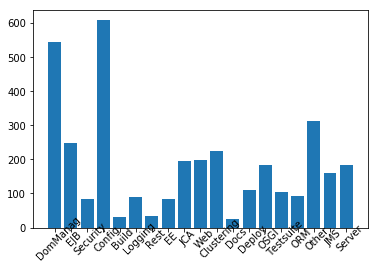

In [8]:
an={}
for i in range(len(AOT)):
    an.update({AOT[i]:data[AOT[i]+'_lab'].sum()}) 

#строим bar chart    
plt.figure()
plt.xticks(range(len(an)), an.keys(),rotation=45, rotation_mode='anchor')    
plt.bar(range(len(an)), list(an.values()), align='center')

In [7]:
bin_data=data

bin_data=pandas.get_dummies(bin_data, prefix=['Resolution'], columns=['Resolution'])

bin_data['Priority_ord']=bin_data['Priority'].astype("category", ordered=True,categories=['Optional', 'Trivial', 'Minor', 'Major', 'Critical', 'Blocker']).cat.codes

bin_data['norm_ttr']=preprocessing.scale(bin_data['ttr'])
bin_data['norm_att']=preprocessing.scale(bin_data['Attachments'])
bin_data['norm_comm']=preprocessing.scale(bin_data['Comments'])

bin_data['Resolution_Wont Fix_new']=bin_data["Resolution_Won't Fix"]+bin_data['Resolution_Incomplete Description']
bin_data['Resolution_Out of Date_new']=bin_data['Resolution_Out of Date']+bin_data['Resolution_Deferred']+bin_data['Resolution_Partially Completed']+bin_data['Resolution_Migrated to another ITS']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [28]:
bin_data

,Unnamed: 0,Unnamed: 0.1,Issue_key,Summary,Status,Project_name,Priority,Components,Labels,Description,...,Resolution_Out of Date,Resolution_Partially Completed,Resolution_Rejected,Resolution_Won't Fix,Priority_ord,norm_ttr,norm_att,norm_comm,Resolution_Wont Fix_new,Resolution_Out of Date_new
0,0,0,AS7-6341,EJB2 CMP - 'JBAS014172: Instance not found in ...,Resolved,Application Server 7,Minor,EJB,NaN,If an entity is removed and new created withi...,...,0,0,0,0,2,-0.387633,-0.285635,1.506962,0,0
1,1,1,AS7-6441,Transaction automatically started for MDB even...,Resolved,Application Server 7,Major,EJB,NaN,When an MDB uses BMT a transaction is still b...,...,0,0,0,0,3,-0.374938,-0.285635,-0.472512,0,0
2,2,2,AS7-995,Exploded EAR deployment error - java.util.zip....,Closed,Application Server 7,Major,VFS,ear maven vfs,"Deployment of EAR application (ejb module, JS...",...,0,0,0,0,3,-0.451106,1.040722,0.022356,0,0
3,3,3,AS7-1739,resteasy.scan=true in web.xml causes error,Closed,Application Server 7,Minor,REST Test Suite,NaN,If I use <tt>resteasy.scan=true</tt> configur...,...,0,0,0,0,2,0.259797,-0.285635,0.517225,0,0
4,4,4,AS7-4208,Inconsistent behaviour when dealing with reste...,Resolved,Application Server 7,Major,REST,NaN,Some of the early code uses these parameters ...,...,0,0,0,0,3,-0.501885,-0.285635,-0.719946,0,0
5,5,5,AS7-2593,Hang in IIOPNamingTestCase with OpenJDK,Resolved,Application Server 7,Major,IIOP,NaN,NaN,...,0,0,0,0,3,1.046869,3.693436,-0.225078,0,0
6,6,6,AS7-6911,jconsole fails if trying to connect to a stand...,Resolved,Application Server 7,Major,CLI,cli,If JBoss AS7/8 is started using port-offset a...,...,0,0,0,0,3,-0.451106,-0.285635,2.001830,0,0
7,7,7,AS7-2185,Don't expose the platform LoggingMXBean over m...,Resolved,Application Server 7,Major,Domain Management,as7-ignored,Currently we are exposing the logging MXBean ...,...,0,0,0,0,3,-0.247991,-0.285635,0.764659,0,0
8,8,8,AS7-5832,Unable to read undefined messaging queue attri...,Resolved,Application Server 7,Major,JMS,NaN,if there is no dead-letter-address defined fo...,...,0,0,0,0,3,-0.489190,-0.285635,-0.472512,0,0
9,9,9,AS7-4747,xercesImpl-2.9.1-jbossas-1.jar is susceptible ...,Resolved,Application Server 7,Major,?,xercesImpl,The current version of xerces (<em>xercesImpl...,...,0,0,0,0,3,-0.489190,-0.285635,-0.472512,0,0


In [8]:
clust_data=bin_data[['Config_lab',
 'Clustering_lab',
 'Deploy_lab',
 'DomManag_lab',
 'EJB_lab',
 'JMS_lab',
 'Security_lab',
 'Server_lab',
 'Web_lab',
 'Docs_lab',
 'Build_lab',
 'Testsuite_lab',
 'ORM_lab',
 'Rest_lab',
 'Logging_lab',
 'EE_lab',
 'OSGI_lab',
 'JCA_lab',
 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Cannot Reproduce', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]


In [18]:
clust_data

,Config_lab,Clustering_lab,Deploy_lab,DomManag_lab,EJB_lab,JMS_lab,Security_lab,Server_lab,Web_lab,Docs_lab,...,Resolution_Done,Resolution_Duplicate Issue,Resolution_Out of Date_new,Resolution_Rejected,Resolution_Wont Fix_new,Resolution_Cannot Reproduce,Priority_ord,norm_ttr,norm_att,norm_comm
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,2,-0.387633,-0.285635,1.506962
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,3,-0.374938,-0.285635,-0.472512
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,3,-0.451106,1.040722,0.022356
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0.259797,-0.285635,0.517225
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,3,-0.501885,-0.285635,-0.719946
5,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,3,1.046869,3.693436,-0.225078
6,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,3,-0.451106,-0.285635,2.001830
7,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,3,-0.247991,-0.285635,0.764659
8,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,3,-0.489190,-0.285635,-0.472512
9,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,3,-0.489190,-0.285635,-0.472512


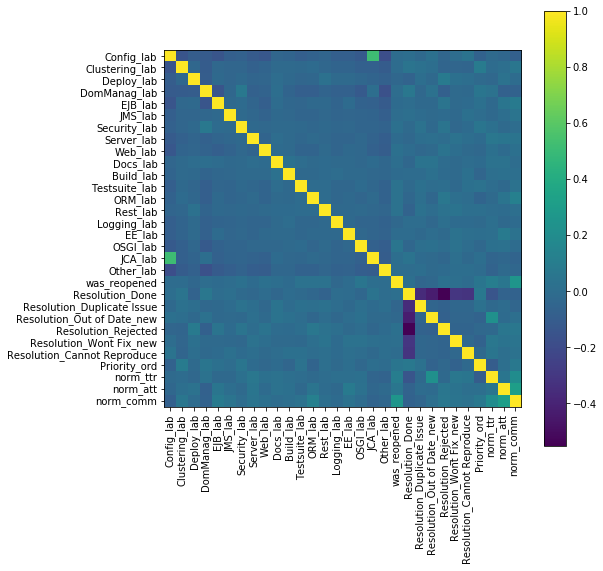

In [12]:
from matplotlib.colors import LinearSegmentedColormap
def corr_heatmap(data):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
    corr_ = data.corr(method='pearson')
    ax.set_xticks(numpy.arange(len(list(data))))
    ax.set_yticks(numpy.arange(len(list(data))))
    ax.set_xticklabels(list(data),rotation=90)
    ax.set_yticklabels(list(data))
    im = ax.imshow(corr_)
    plt.colorbar(im)
    return plt.show()


corr_heatmap(clust_data)


<function matplotlib.pyplot.bar(*args, **kwargs)>

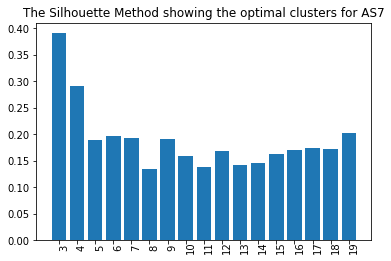

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

def silh_index(data,title):
    silh_ind={}
    for i in range(3,20):
        kmeans=KMeans(n_clusters=i, random_state=42)
        labi=kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data,labi)
        silh_ind.update({i:silhouette_avg})
    plt.figure()
    plt.xticks(range(len(silh_ind)), silh_ind.keys(),rotation=90, rotation_mode='anchor')    
    plt.bar(range(len(silh_ind)), silh_ind.values(), align='center')
    plt.title(title)
    return plt.bar

silh_index(clust_data,'The Silhouette Method showing the optimal clusters for AS7')


In [18]:
def km_clustering(n,data): 
    headers=list(data)
    zz={}
    km = KMeans(n_clusters=n, random_state=42).fit(data)
    data['cluster_km'] = km.labels_
    zentr=numpy.round(km.cluster_centers_, 3)    

    for i in range(n):
        zrow=zentr[i,:]
        zi=dict(zip(headers, zrow))
        zz.update({i:zi})             
    print(zz) 
    return data

data_km=clust_data[['Config_lab', 'Clustering_lab', 'Deploy_lab', 'DomManag_lab', 'EJB_lab', 'JMS_lab', 'Security_lab', 'Server_lab', 'Web_lab', 'Docs_lab', 'Build_lab', 'Testsuite_lab', 'ORM_lab', 'Rest_lab', 'Logging_lab', 'EE_lab', 'OSGI_lab', 'JCA_lab', 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Cannot Reproduce', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]

d_km=km_clustering(3,data_km)
print (d_km.groupby(['cluster_km']).size())


{0: {'Logging_lab': 0.041, 'Resolution_Cannot Reproduce': 0.069, 'Web_lab': 0.098, 'Resolution_Wont Fix_new': 0.053, 'Server_lab': 0.065, 'DomManag_lab': 0.229, 'JCA_lab': 0.037, 'EJB_lab': 0.065, 'norm_att': -0.156, 'was_reopened': 0.171, 'Resolution_Done': 0.527, 'EE_lab': 0.045, 'Config_lab': 0.02, 'Docs_lab': 0.012, 'norm_ttr': 2.495, 'Deploy_lab': 0.016, 'Build_lab': 0.008, 'Rest_lab': 0.008, 'Resolution_Duplicate Issue': 0.024, 'JMS_lab': 0.045, 'OSGI_lab': 0.065, 'Testsuite_lab': 0.029, 'Priority_ord': 2.951, 'ORM_lab': 0.029, 'Resolution_Rejected': 0.082, 'Clustering_lab': 0.086, 'Resolution_Out of Date_new': 0.245, 'Security_lab': 0.02, 'norm_comm': 0.519, 'Other_lab': 0.22}, 1: {'Logging_lab': 0.03, 'Resolution_Cannot Reproduce': 0.025, 'Web_lab': 0.066, 'Resolution_Wont Fix_new': 0.023, 'Server_lab': 0.06, 'DomManag_lab': 0.188, 'JCA_lab': 0.071, 'EJB_lab': 0.079, 'norm_att': -0.202, 'was_reopened': 0.07, 'Resolution_Done': 0.794, 'EE_lab': 0.025, 'Config_lab': 0.016, 'Docs_

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

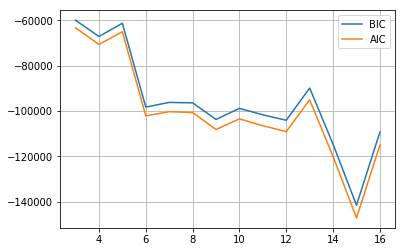

In [14]:
from sklearn.mixture import GaussianMixture


def AIC_BIC(data, title):
    plt.figure()
    n_components = numpy.arange(3, 17)    
    models = [GaussianMixture(n, covariance_type='tied', random_state=80).fit(data)
              for n in n_components]
    plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
    plt.legend() 
    plt.title(title)
    plt.grid(True)
    return plt

AIC_BIC(clust_data, 'BIC/AIC showing the optimal clusters for AS7')


In [10]:
def em_clust(data,n):
    gmm = GaussianMixture(n_components=n, covariance_type='spherical', random_state=80)
    gmm.fit(data)
    data['cluster_em'] = gmm.predict(data)
    for i in range (n):
        temp=data[data['cluster_em']==i]
        print ('Cluster # '+str(i)+ ', count: '+str(len(temp.index)))
        print (temp.mean())

    return 


clust_data_gmm=clust_data[['Config_lab', 'Clustering_lab', 'Deploy_lab', 'DomManag_lab', 'EJB_lab', 'JMS_lab', 'Security_lab', 'Server_lab', 'Web_lab', 'Docs_lab', 'Build_lab', 'Testsuite_lab', 'ORM_lab', 'Rest_lab', 'Logging_lab', 'EE_lab', 'OSGI_lab', 'JCA_lab', 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Cannot Reproduce', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]

em_clust(clust_data_gmm,15)

Cluster # 0, count: 219
Config_lab                     0.200913
Clustering_lab                 0.050228
Deploy_lab                     0.086758
DomManag_lab                   0.095890
EJB_lab                        0.114155
JMS_lab                        0.054795
Security_lab                   0.022831
Server_lab                     0.068493
Web_lab                        0.073059
Docs_lab                       0.009132
Build_lab                      0.018265
Testsuite_lab                  0.022831
ORM_lab                        0.027397
Rest_lab                       0.009132
Logging_lab                    0.027397
EE_lab                         0.041096
OSGI_lab                       0.105023
JCA_lab                        0.045662
Other_lab                      0.109589
was_reopened                   0.105023
Resolution_Done                0.671233
Resolution_Duplicate Issue     0.059361
Resolution_Out of Date_new     0.041096
Resolution_Rejected            0.146119
Resolution_Wont 